Loading the Dataset:

In [2]:
import pandas as pd

In [3]:
df=pd.read_csv("D:\DS PROJECT 5\Dataset File\World_development_mesurement.csv")

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\anura\AppData\Local\Temp\ipykernel_11520\411094449.py:1: SyntaxWarning: invalid escape sequence '\D'
  df=pd.read_csv("D:\DS PROJECT 5\Dataset File\World_development_mesurement.csv")


In [4]:
df

,Birth Rate,Business Tax Rate,CO2 Emissions,Country,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,...,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
0,0.020,NaN,87931.0,Algeria,NaN,NaN,26998.0,"$54,790,058,957",0.035,$60,...,67.0,0.0,1,0.342,0.619,0.039,31719449,0.599,"$102,000,000","$193,000,000"
1,0.050,NaN,9542.0,Angola,NaN,NaN,7499.0,"$9,129,594,819",0.034,$22,...,44.0,0.0,1,0.476,0.499,0.025,13924930,0.324,"$34,000,000","$146,000,000"
2,0.043,NaN,1617.0,Benin,NaN,NaN,1983.0,"$2,359,122,303",0.043,$15,...,53.0,0.0,1,0.454,0.517,0.029,6949366,0.383,"$77,000,000","$50,000,000"
3,0.027,NaN,4276.0,Botswana,NaN,NaN,1836.0,"$5,788,311,645",0.047,$152,...,49.0,0.1,1,0.383,0.587,0.029,1755375,0.532,"$227,000,000","$209,000,000"
4,0.046,NaN,1041.0,Burkina Faso,NaN,NaN,NaN,"$2,610,959,139",0.051,$12,...,49.0,0.0,1,0.468,0.505,0.028,11607944,0.178,"$23,000,000","$30,000,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2699,NaN,NaN,NaN,Turks and Caicos Islands,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1,NaN,NaN,NaN,32427,0.911,NaN,NaN
2700,0.013,46.4%,NaN,United States,5.0,4.0,2132446.0,"$16,244,600,000,000",0.179,"$8,895",...,76.0,1.0,1,0.196,0.667,0.136,313873685,0.811,"$200,092,000,000","$126,573,000,000"
2701,0.015,41.9%,NaN,Uruguay,7.0,85.0,NaN,"$50,004,354,667",0.089,"$1,308",...,74.0,1.5,1,0.220,0.639,0.140,3395253,0.948,"$2,222,000,000","$1,028,000,000"
2702,0.020,61.9%,NaN,"Venezuela, RB",144.0,180.0,NaN,"$381,286,223,859",0.046,$593,...,72.0,1.0,1,0.288,0.652,0.060,29954782,0.889,"$904,000,000","$3,202,000,000"


Shape of the Dataset:

In [6]:
df.shape

(2704, 25)

There are 2976 columns and 25 rows in the dataset.

In [8]:
df.columns

Index(['Birth Rate', 'Business Tax Rate', 'CO2 Emissions', 'Country',
       'Days to Start Business', 'Ease of Business', 'Energy Usage', 'GDP',
       'Health Exp % GDP', 'Health Exp/Capita', 'Hours to do Tax',
       'Infant Mortality Rate', 'Internet Usage', 'Lending Interest',
       'Life Expectancy Female', 'Life Expectancy Male', 'Mobile Phone Usage',
       'Number of Records', 'Population 0-14', 'Population 15-64',
       'Population 65+', 'Population Total', 'Population Urban',
       'Tourism Inbound', 'Tourism Outbound'],
      dtype='object')

In [9]:
numerical_columns=df.select_dtypes(['int','float64']).columns

In [10]:
numerical_columns

Index(['Birth Rate', 'CO2 Emissions', 'Days to Start Business',
       'Ease of Business', 'Energy Usage', 'Health Exp % GDP',
       'Hours to do Tax', 'Infant Mortality Rate', 'Internet Usage',
       'Lending Interest', 'Life Expectancy Female', 'Life Expectancy Male',
       'Mobile Phone Usage', 'Number of Records', 'Population 0-14',
       'Population 15-64', 'Population 65+', 'Population Total',
       'Population Urban'],
      dtype='object')

There are 19 numerical columns.

In [12]:
categorical_columns=df.select_dtypes('object').columns

In [13]:
categorical_columns

Index(['Business Tax Rate', 'Country', 'GDP', 'Health Exp/Capita',
       'Tourism Inbound', 'Tourism Outbound'],
      dtype='object')

There are 6 categorical columns.

Checking for Missing values:

In [16]:
df.isnull().sum()

Birth Rate                 119
Business Tax Rate         1281
CO2 Emissions              579
Country                      0
Days to Start Business     986
Ease of Business          2519
Energy Usage               919
GDP                        210
Health Exp % GDP           309
Health Exp/Capita          309
Hours to do Tax           1288
Infant Mortality Rate      260
Internet Usage             173
Lending Interest           824
Life Expectancy Female     136
Life Expectancy Male       136
Mobile Phone Usage         167
Number of Records            0
Population 0-14            220
Population 15-64           220
Population 65+             220
Population Total             0
Population Urban            26
Tourism Inbound            368
Tourism Outbound           471
dtype: int64

Data Cleaning:

In [18]:
for col in ['Business Tax Rate', 'GDP', 'Health Exp/Capita', 'Tourism Inbound', 'Tourism Outbound']: 
    if col in df.columns:
        df[col] = df[col].str.replace(',', '')  # remove commas
        df[col] = df[col].str.replace('%', '')  # remove %
        df[col] = df[col].str.replace('$', '')  # remove $
        df[col] = pd.to_numeric(df[col], errors='coerce')


Checking for unique values in each column:

In [20]:
df.nunique()

Birth Rate                  47
Business Tax Rate          447
CO2 Emissions             1743
Country                    208
Days to Start Business     126
Ease of Business           185
Energy Usage              1721
GDP                       2494
Health Exp % GDP           145
Health Exp/Capita         1069
Hours to do Tax            280
Infant Mortality Rate      129
Internet Usage              11
Lending Interest           351
Life Expectancy Female      49
Life Expectancy Male        47
Mobile Phone Usage          26
Number of Records            1
Population 0-14            376
Population 15-64           298
Population 65+             208
Population Total          2699
Population Urban           822
Tourism Inbound           1650
Tourism Outbound          1457
dtype: int64

Finding Statistical Summary:

In [23]:
df.describe()

,Birth Rate,Business Tax Rate,CO2 Emissions,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,...,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
count,2585.000000,1423.000000,2.125000e+03,1718.000000,185.000000,1.785000e+03,2.494000e+03,2395.000000,2395.000000,1416.000000,...,2568.000000,2537.000000,2704.0,2484.000000,2484.000000,2484.000000,2.704000e+03,2678.000000,2.336000e+03,2.233000e+03
mean,0.022715,48.966901,1.423071e+05,39.999418,94.875676,7.723684e+04,2.638540e+11,0.064170,801.397077,302.068503,...,66.461838,0.578124,1.0,0.303051,0.623481,0.073465,3.145729e+07,0.562953,4.939320e+09,4.729435e+09
std,0.011338,40.954116,6.159288e+05,57.318588,54.791906,2.599239e+05,1.129910e+12,0.026325,1473.448036,273.299686,...,9.390217,0.474647,0.0,0.106577,0.069660,0.049541,1.242894e+08,0.245897,1.385098e+10,1.326774e+10
min,0.007000,8.200000,7.000000e+00,1.000000,1.000000,8.000000e+00,6.310127e+07,0.008000,2.000000,12.000000,...,37.000000,0.000000,1.0,0.118000,0.474000,0.003000,1.887600e+04,0.082000,7.000000e+05,2.000000e+05
25%,0.013000,32.400000,1.360000e+03,13.000000,48.000000,3.737000e+03,3.539042e+09,0.046000,50.000000,156.000000,...,61.000000,0.100000,1.0,0.204750,0.559000,0.033000,8.783360e+05,0.356000,1.250000e+08,1.100000e+08
50%,0.020000,41.000000,8.529000e+03,26.000000,94.000000,1.433800e+04,1.507975e+10,0.061000,193.000000,239.000000,...,69.000000,0.500000,1.0,0.299500,0.642500,0.052000,5.800324e+06,0.560000,6.885000e+08,4.560000e+08
75%,0.031000,51.550000,5.910800e+04,45.000000,142.000000,4.185200e+04,1.102047e+11,0.079000,665.000000,344.750000,...,73.250000,0.900000,1.0,0.402000,0.676000,0.112000,2.014089e+07,0.765000,3.601500e+09,2.842000e+09
max,0.053000,339.100000,8.286892e+06,694.000000,189.000000,2.727728e+06,1.624460e+13,0.225000,9908.000000,2600.000000,...,88.000000,2.900000,1.0,0.500000,0.858000,0.244000,1.350695e+09,1.000000,2.000920e+11,1.265730e+11


Handling Missing Values:

In [25]:
df.isnull().mean().sort_values(ascending=True)*100

Population Total           0.000000
Country                    0.000000
Number of Records          0.000000
Population Urban           0.961538
Birth Rate                 4.400888
Life Expectancy Male       5.029586
Life Expectancy Female     5.029586
Mobile Phone Usage         6.176036
Internet Usage             6.397929
GDP                        7.766272
Population 0-14            8.136095
Population 15-64           8.136095
Population 65+             8.136095
Infant Mortality Rate      9.615385
Health Exp/Capita         11.427515
Health Exp % GDP          11.427515
Tourism Inbound           13.609467
Tourism Outbound          17.418639
CO2 Emissions             21.412722
Lending Interest          30.473373
Energy Usage              33.986686
Days to Start Business    36.464497
Business Tax Rate         47.374260
Hours to do Tax           47.633136
Ease of Business          93.158284
dtype: float64

In [26]:
df.drop(columns=['Ease of Business'], inplace=True)

In [27]:
for col in df.columns:
    if df[col].dtype == 'O':
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].median())



Dropped the ease of business column because it had more than 90% missing values and imputed numrical columns using median and categorical columns using mode.

In [29]:
numerical_columns=df.select_dtypes('float64').columns

Distribution Check with Histogram

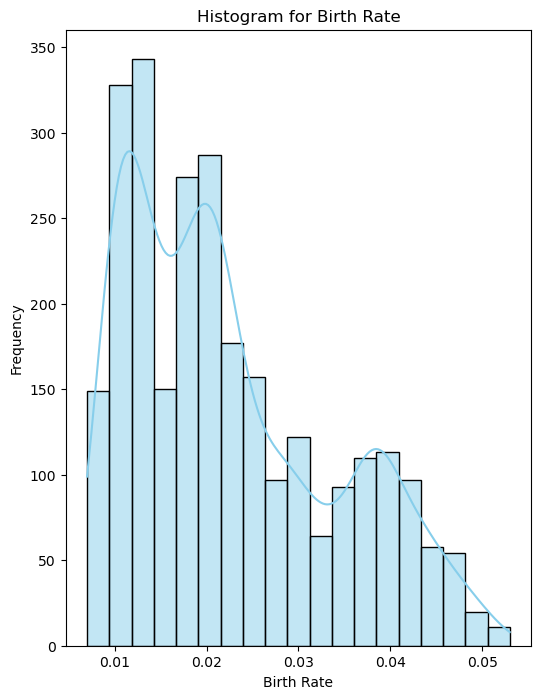

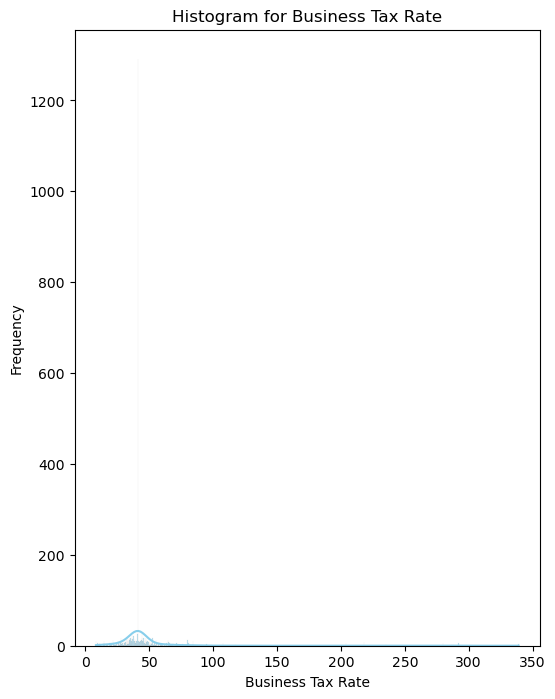

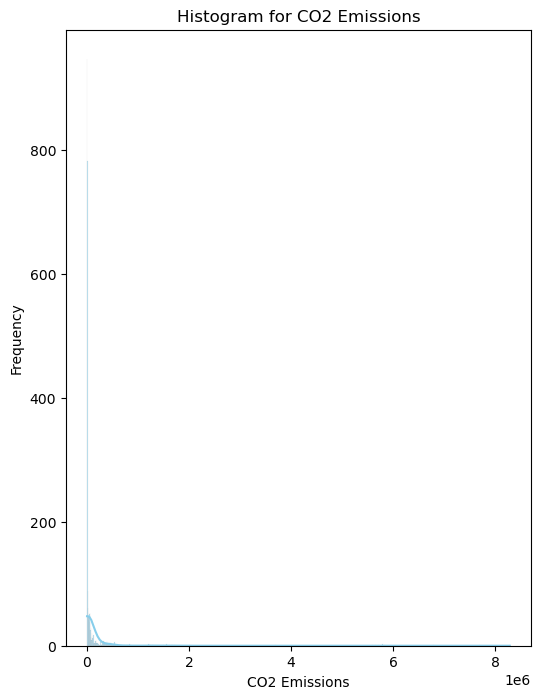

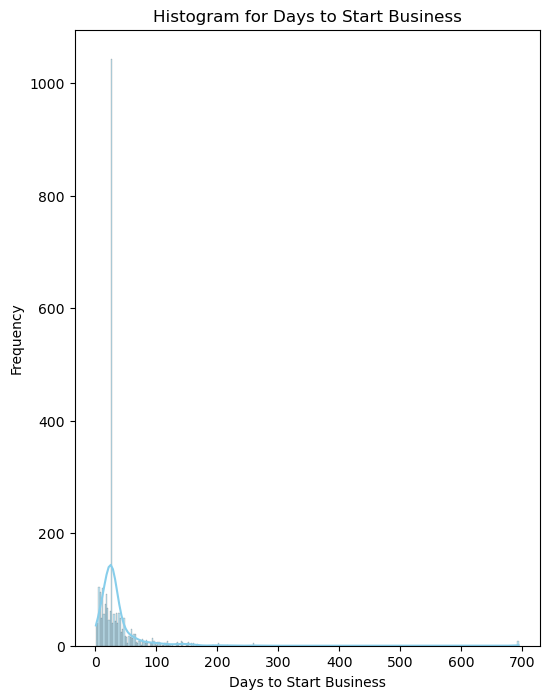

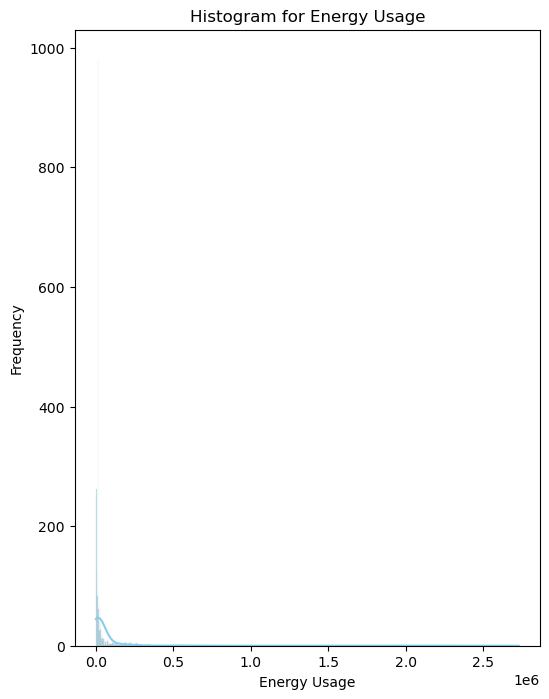

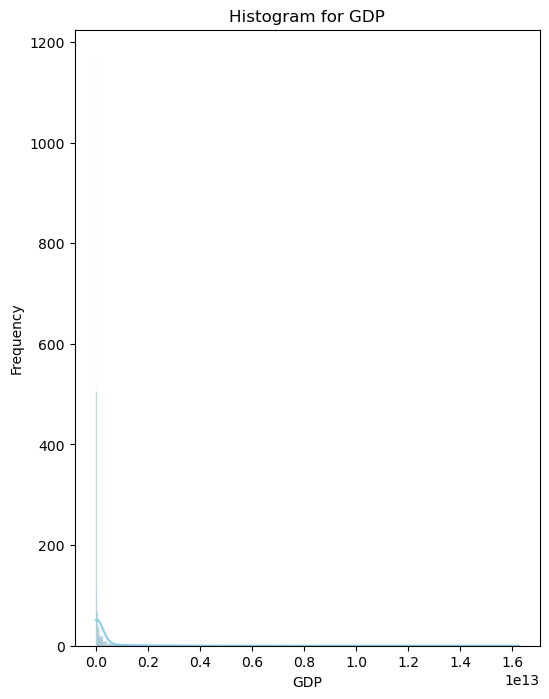

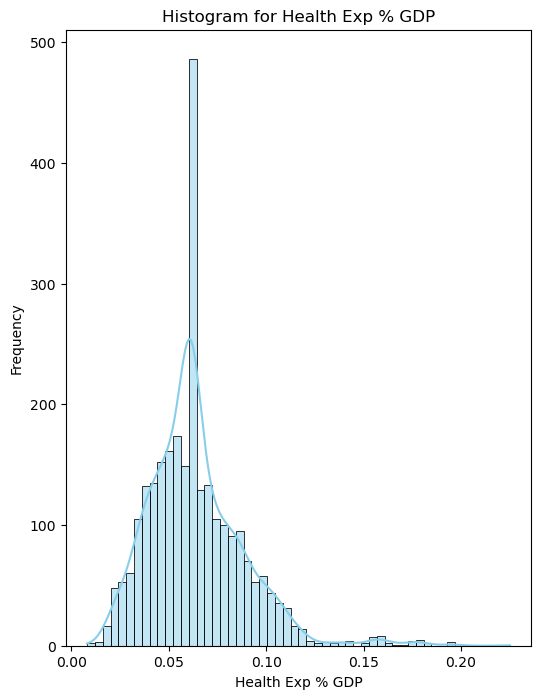

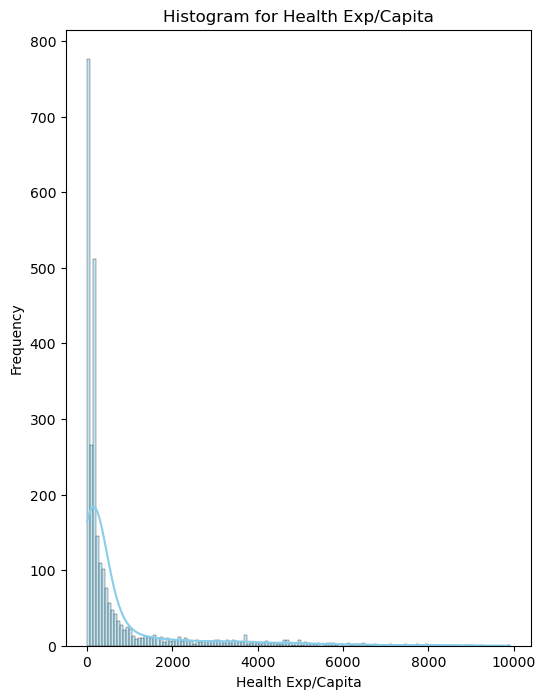

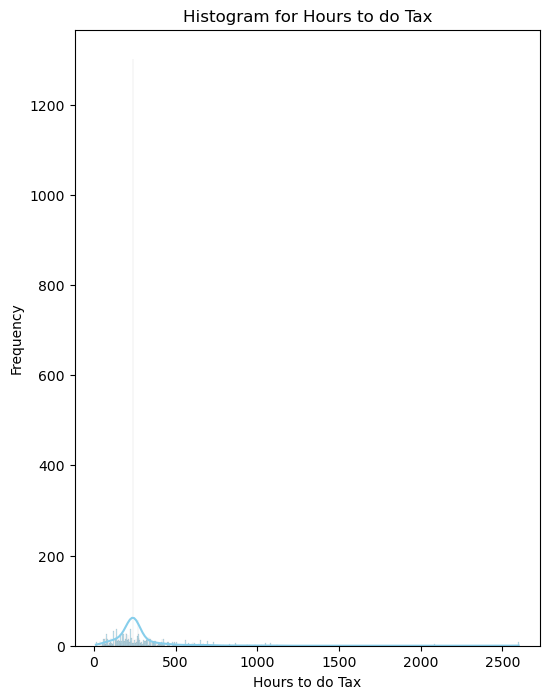

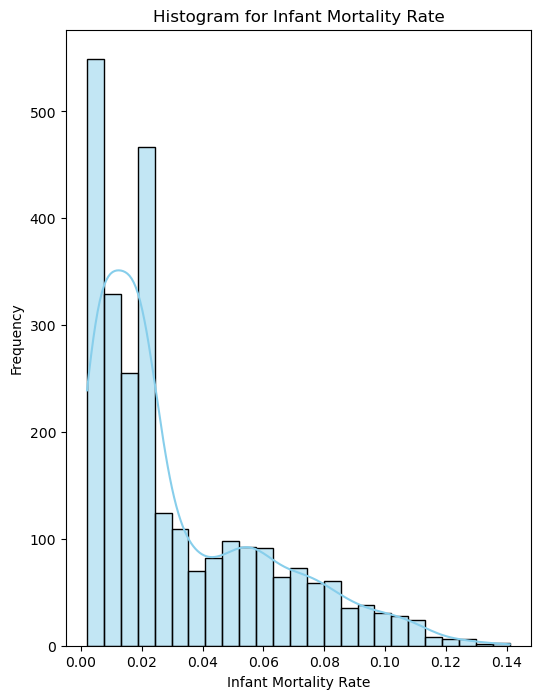

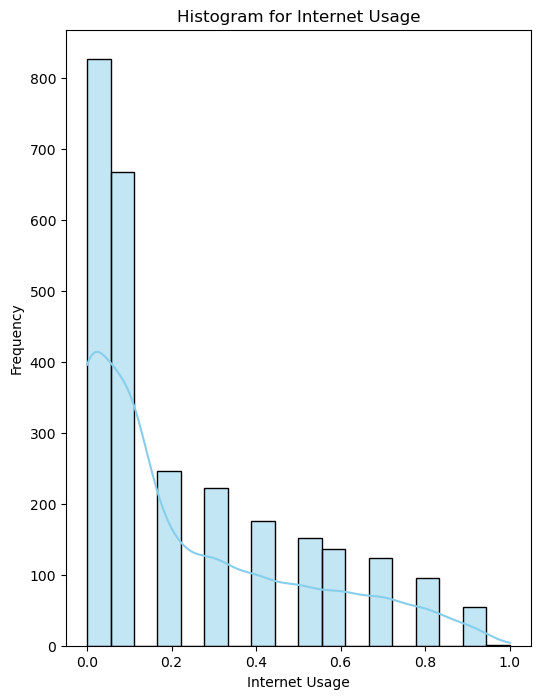

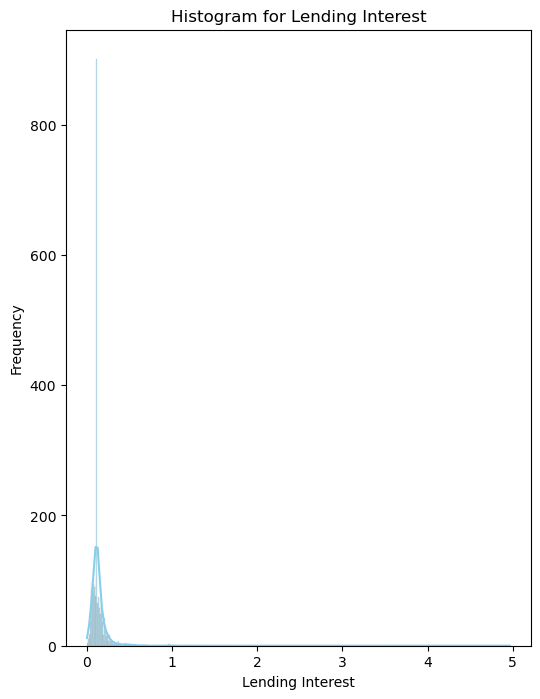

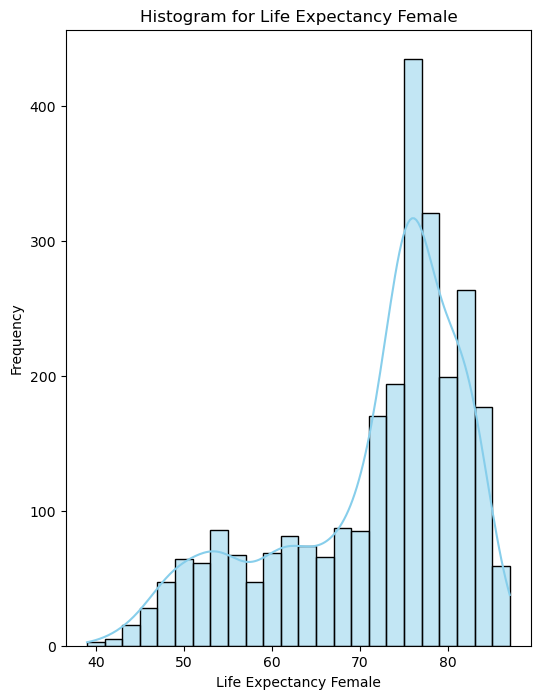

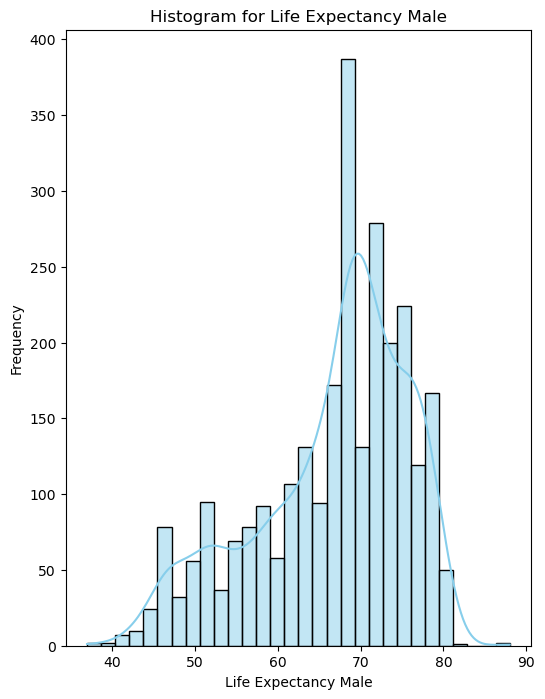

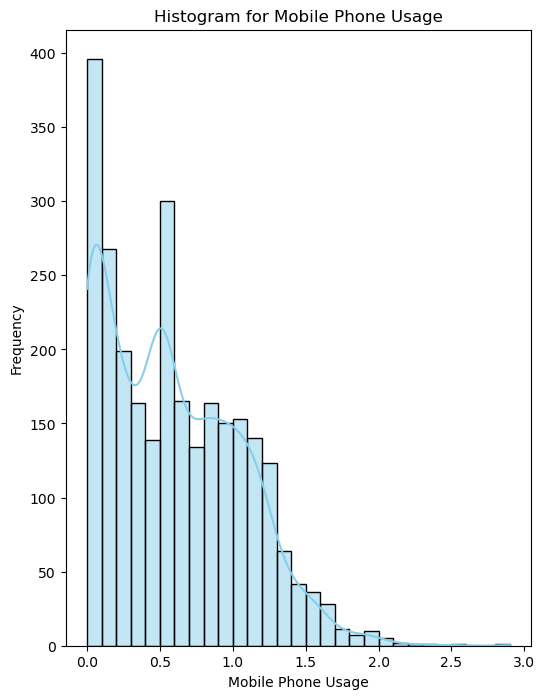

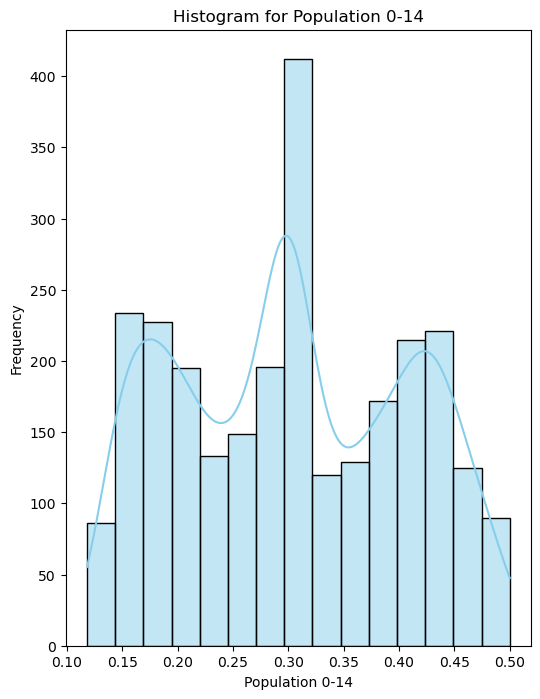

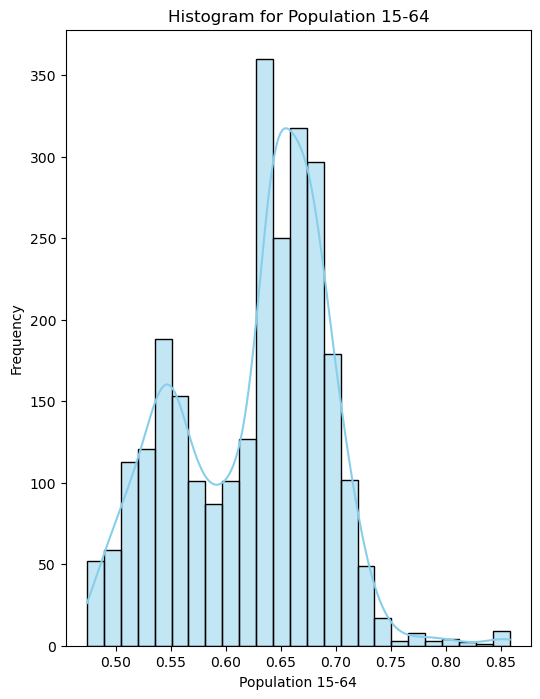

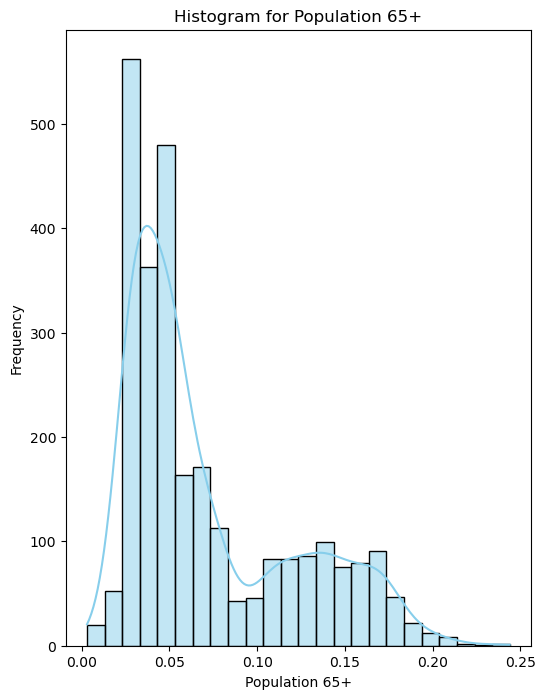

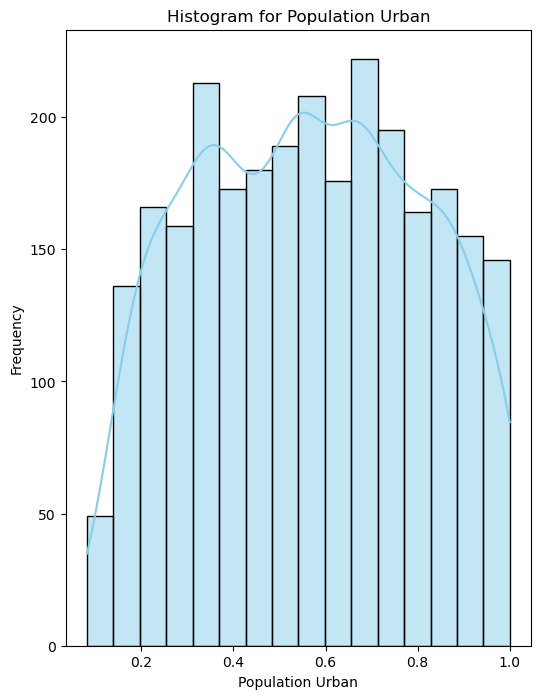

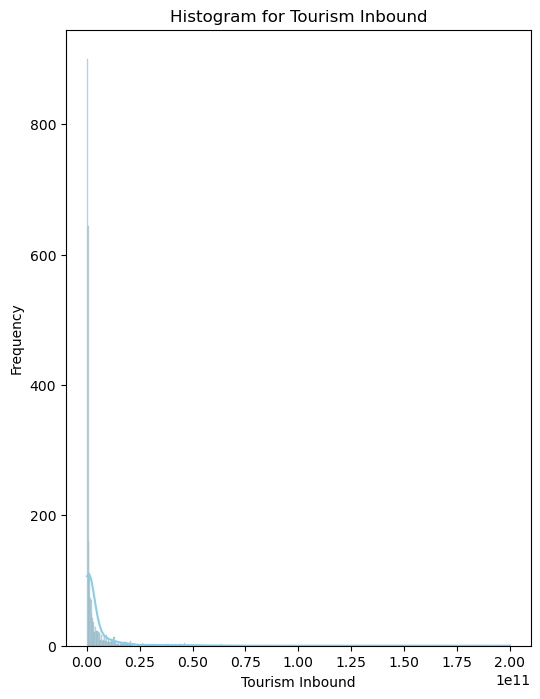

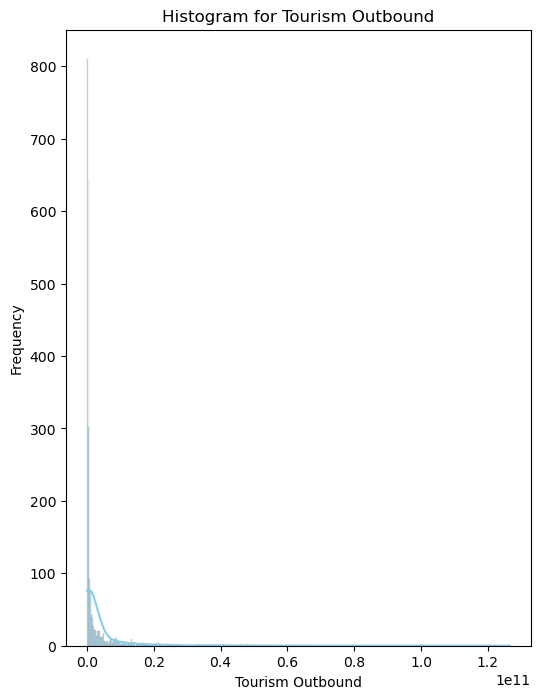

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
for col in numerical_columns:
    plt.figure(figsize=(6,8))
    sns.histplot(df[col],color='skyblue',kde=True)
    plt.title(f"Histogram for {col}")
    plt.xlabel(f"{col}")
    plt.ylabel("Frequency")
    plt.show()

Birth Rate:
The distribution is moderately right-skewed.

CO2 Emissions:
The distribution is highly right-skewed.

Days to Start Business:
The distribution is extremely right-skewed.

Energy Usage:
The distribution is highly right-skewed.

Health Expenditure:
The distribution is moderately right-skewed.

Hours to do Tax:
The distribution is strongly right-skewed.

Infant Mortality Rate:
The distribution is moderately right-skewed.

Internet Usage:
The distribution is right-skewed.

Lending Interest:
The distribution is extremely right-skewed.

Life Expectancy Female:
The distribution is moderately left-skewed.

Life Expectancy Male:
The distribution is slightly left-skewed.

Mobile Phone Usage:
The distribution is moderately right-skewed.

Number of Records:
The distribution is perfectly symmetric, meaning the data is uniformly distributed.

Population 0–14:
The distribution is approximately symmetric.

Population 15–64:
The distribution is slightly left-skewed.

Population 65+:
The distribution is moderately right-skewed.

Population Total:
The distribution is highly right-skewed.

Population Urban:
The distribution is approximately symmetric.

In [33]:
import warnings
warnings.filterwarnings('ignore')

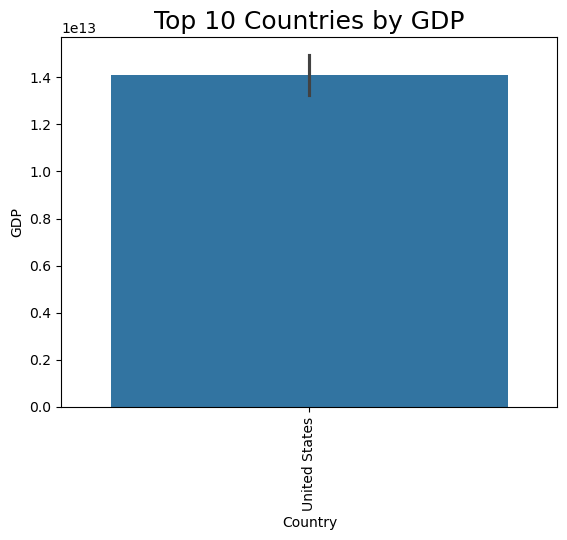

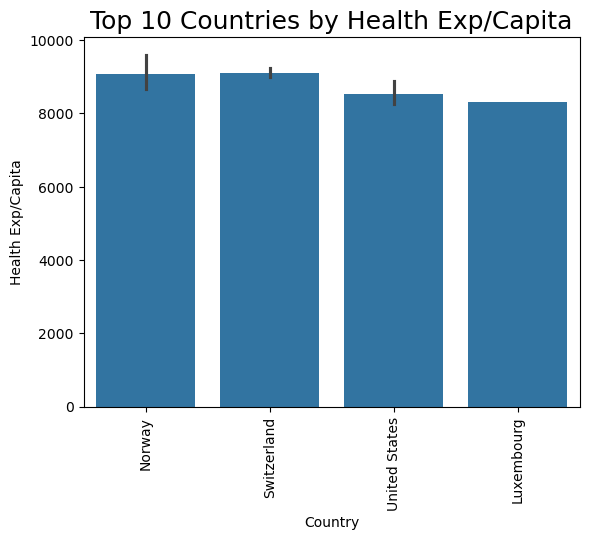

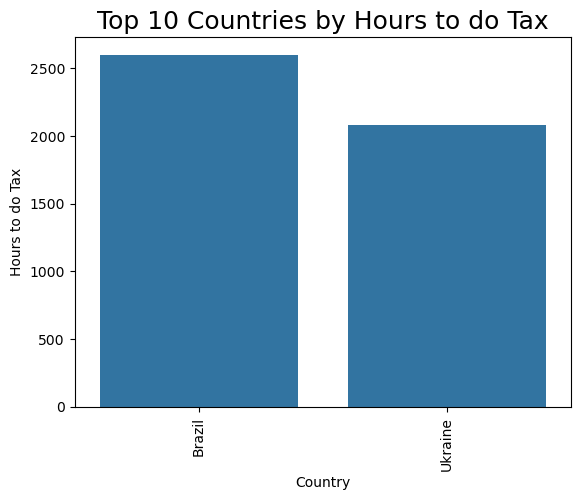

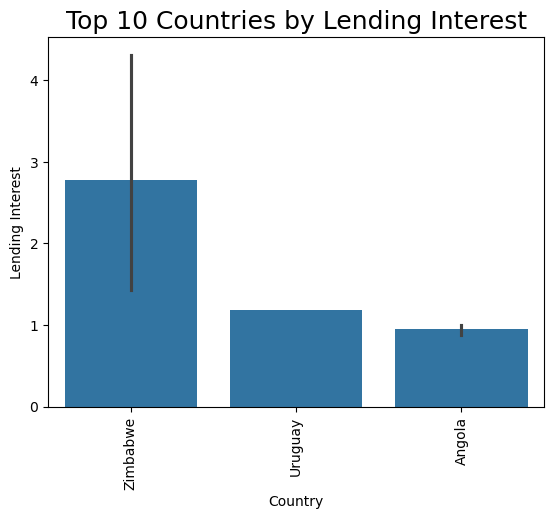

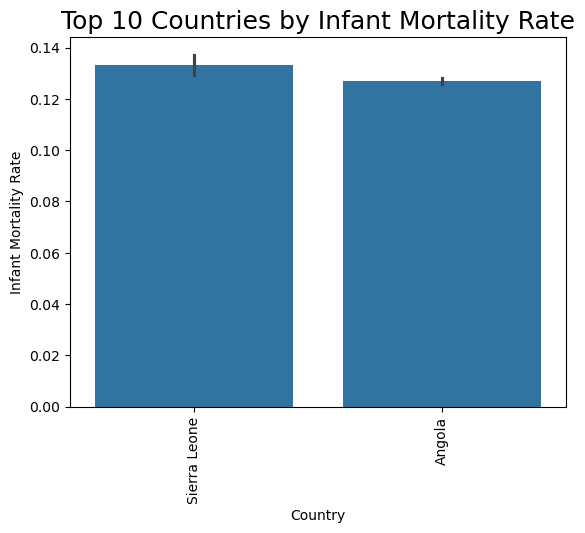

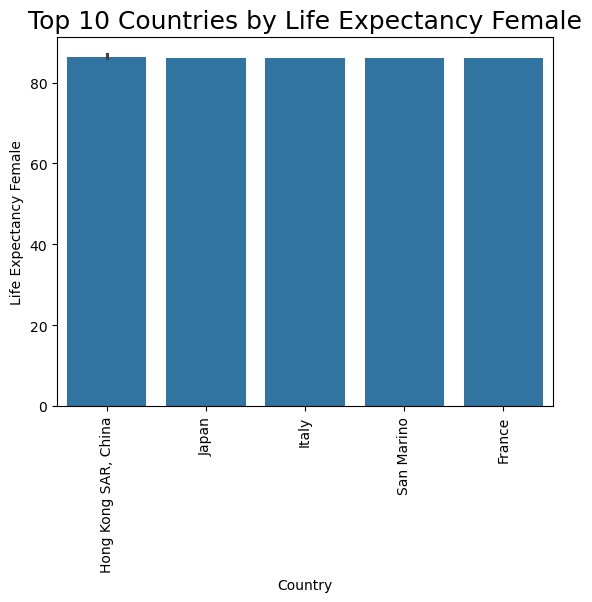

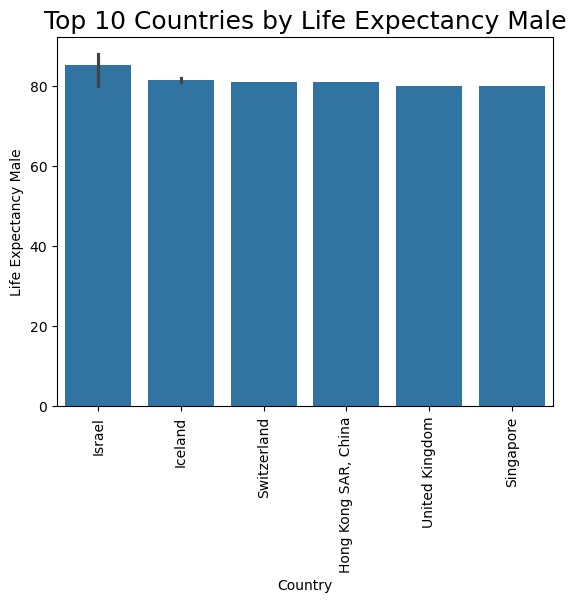

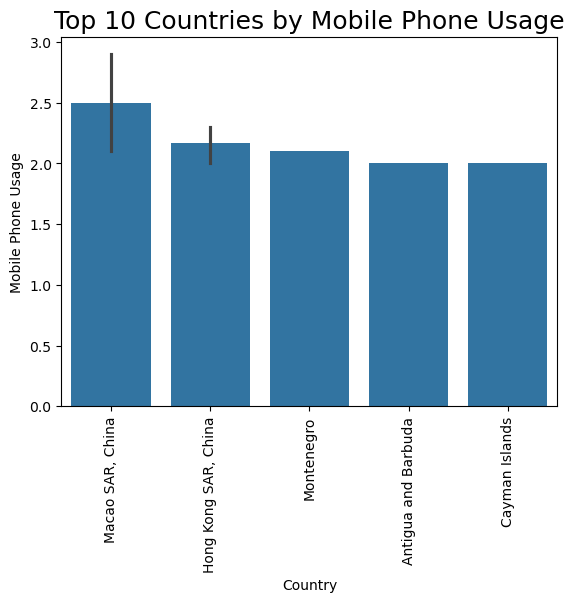

In [34]:
cols = ['GDP','Health Exp/Capita', 'Hours to do Tax','Lending Interest','Infant Mortality Rate', 'Life Expectancy Female', 
        'Life Expectancy Male','Mobile Phone Usage']

for col in cols:
    top_values=df[['Country', col]].sort_values(col, ascending=False).head(10)
    sns.barplot(x='Country',y=col,data=top_values)
    plt.title(f"Top 10 Countries by {col}", fontsize=18)
    plt.xticks(rotation=90)
    plt.show()
    

  Plotting BoxPlot to identify outliers:

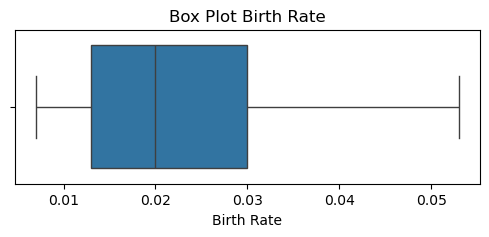

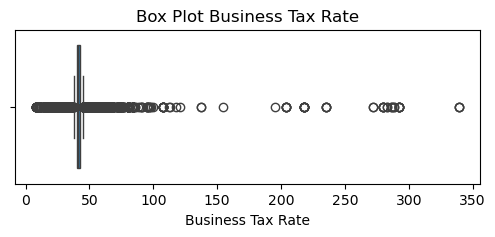

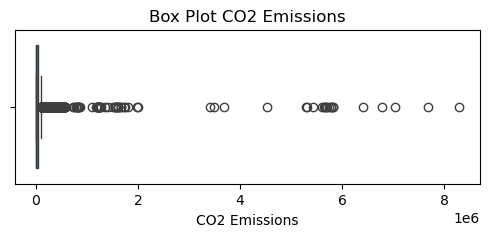

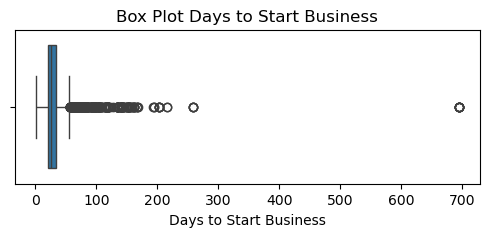

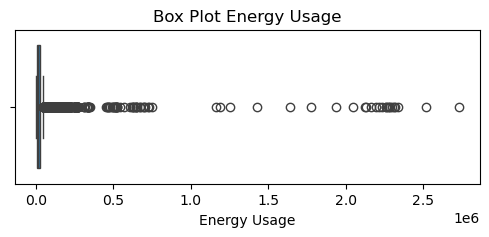

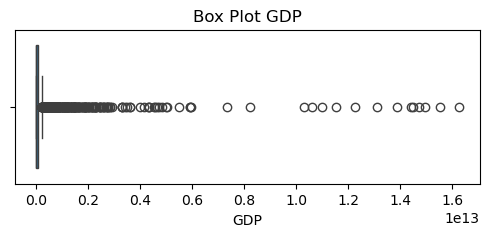

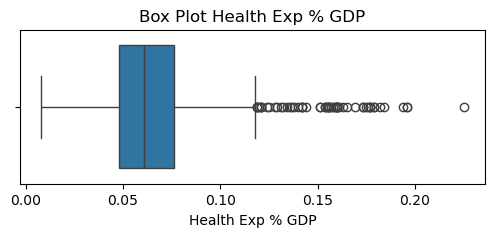

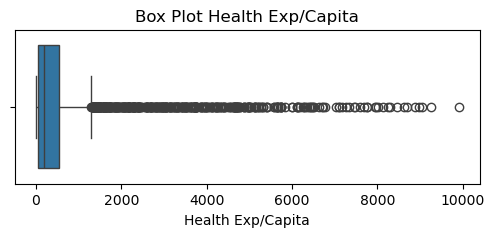

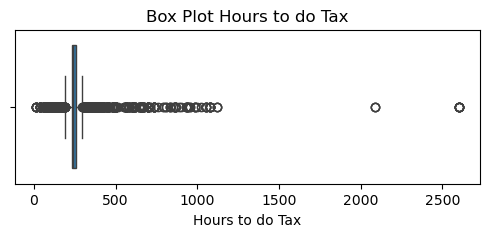

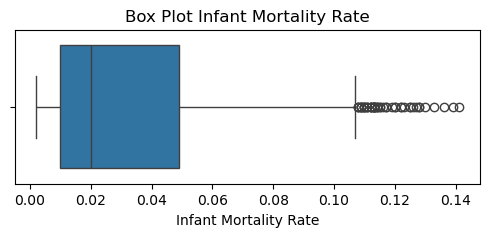

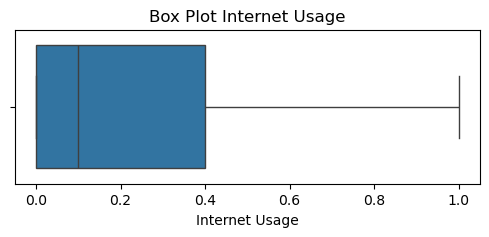

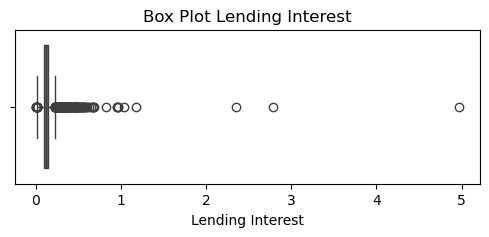

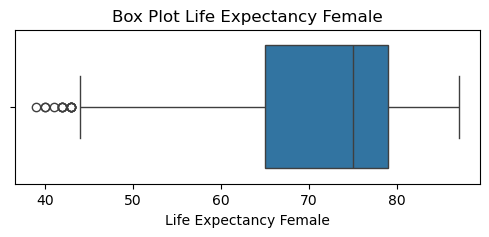

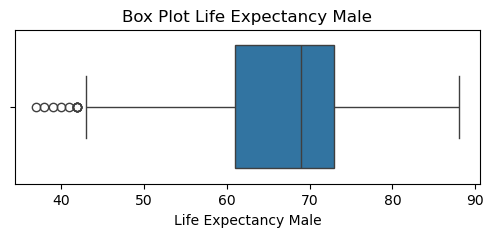

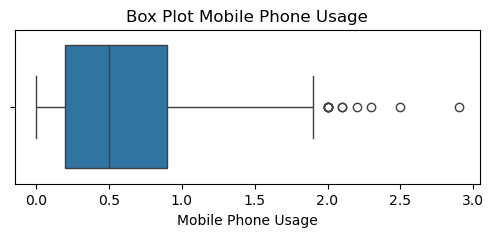

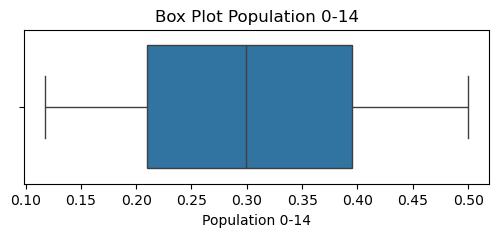

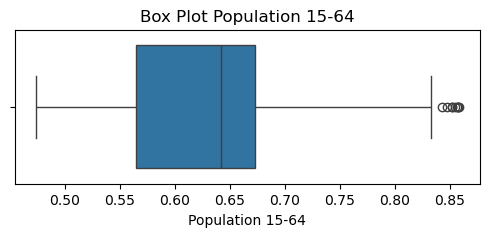

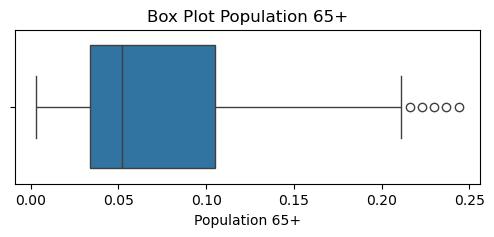

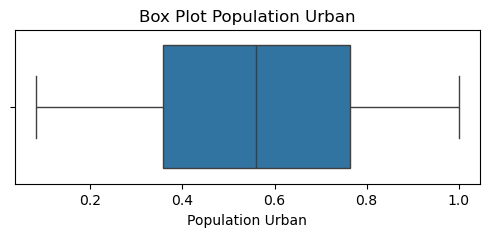

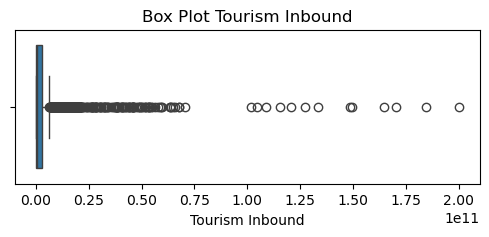

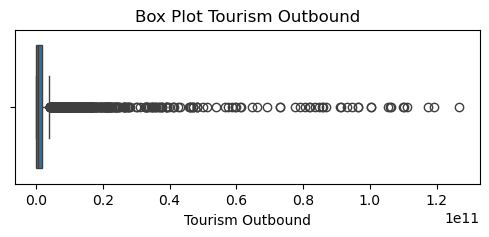

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

for cols in numerical_columns:
    plt.figure(figsize=(6,2))
    sns.boxplot(x=df[cols])
    plt.title(f"Box Plot {cols}")
    plt.show()

CO2 Emissions, Energy Usage, Days to Start Business, Hours to do Tax,Ease of Business and Population Total are showing a large number of extreme outliers.

Birth Rate, Infant Mortality Rate, Health Expenditure (% GDP), Internet Usage, Mobile Phone Usage, and Population 65+ are showing moderate outliers.

Life Expectancy (Male & Female) boxplots show lower-end outliers.

Population 15–64, Population 0–14, Population Urban, and Number of Records
show very few or no outliers.

Correlation Matrix:

In [39]:
df.corr(numeric_only=True)

,Birth Rate,Business Tax Rate,CO2 Emissions,Days to Start Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,...,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
Birth Rate,1.000000,0.210435,-0.148665,0.142392,-0.159230,-0.184839,-0.203536,-0.411804,0.055880,0.866444,...,-0.821947,-0.536971,NaN,0.941822,-0.906371,-0.737706,-0.054973,-0.592360,-0.270296,-0.275113
Business Tax Rate,0.210435,1.000000,0.025192,0.022330,0.027167,0.016925,0.044159,-0.073806,0.157252,0.222757,...,-0.220166,-0.106278,NaN,0.158522,-0.188364,-0.073951,0.053004,-0.093333,0.000344,-0.004125
CO2 Emissions,-0.148665,0.025192,1.000000,-0.027550,0.908944,0.693480,0.144582,0.207046,0.066940,-0.107813,...,0.112328,0.016765,NaN,-0.169931,0.158759,0.142830,0.655298,0.073803,0.591023,0.561877
Days to Start Business,0.142392,0.022330,-0.027550,1.000000,-0.037432,-0.058190,-0.101871,-0.142882,0.151162,0.149225,...,-0.172542,-0.111373,NaN,0.163997,-0.136081,-0.157461,0.011373,-0.083134,-0.095646,-0.091924
Energy Usage,-0.159230,0.027167,0.908944,-0.037432,1.000000,0.852598,0.204383,0.283808,0.069807,-0.118395,...,0.127748,0.044601,NaN,-0.187804,0.162603,0.175438,0.653808,0.093780,0.738068,0.696566
GDP,-0.184839,0.016925,0.693480,-0.058190,0.852598,1.000000,0.330315,0.451191,0.040062,-0.167284,...,0.195792,0.128016,NaN,-0.228162,0.150629,0.278436,0.381322,0.164949,0.880682,0.858337
Health Exp % GDP,-0.203536,0.044159,0.144582,-0.101871,0.204383,0.330315,1.000000,0.445972,-0.040249,-0.157454,...,0.193580,0.163672,NaN,-0.262464,0.081764,0.445454,-0.050497,0.178169,0.368690,0.353248
Health Exp/Capita,-0.411804,-0.073806,0.207046,-0.142882,0.283808,0.451191,0.445972,1.000000,-0.153628,-0.426319,...,0.477241,0.418276,NaN,-0.478777,0.320361,0.573116,0.005577,0.438859,0.524197,0.553759
Hours to do Tax,0.055880,0.157252,0.066940,0.151162,0.069807,0.040062,-0.040249,-0.153628,1.000000,0.082720,...,-0.108671,-0.005034,NaN,0.048673,-0.059124,-0.019068,0.123811,-0.003348,-0.035452,-0.016411
Infant Mortality Rate,0.866444,0.222757,-0.107813,0.149225,-0.118395,-0.167284,-0.157454,-0.426319,0.082720,1.000000,...,-0.900726,-0.563304,NaN,0.808403,-0.790545,-0.614331,0.017421,-0.594938,-0.244072,-0.247918


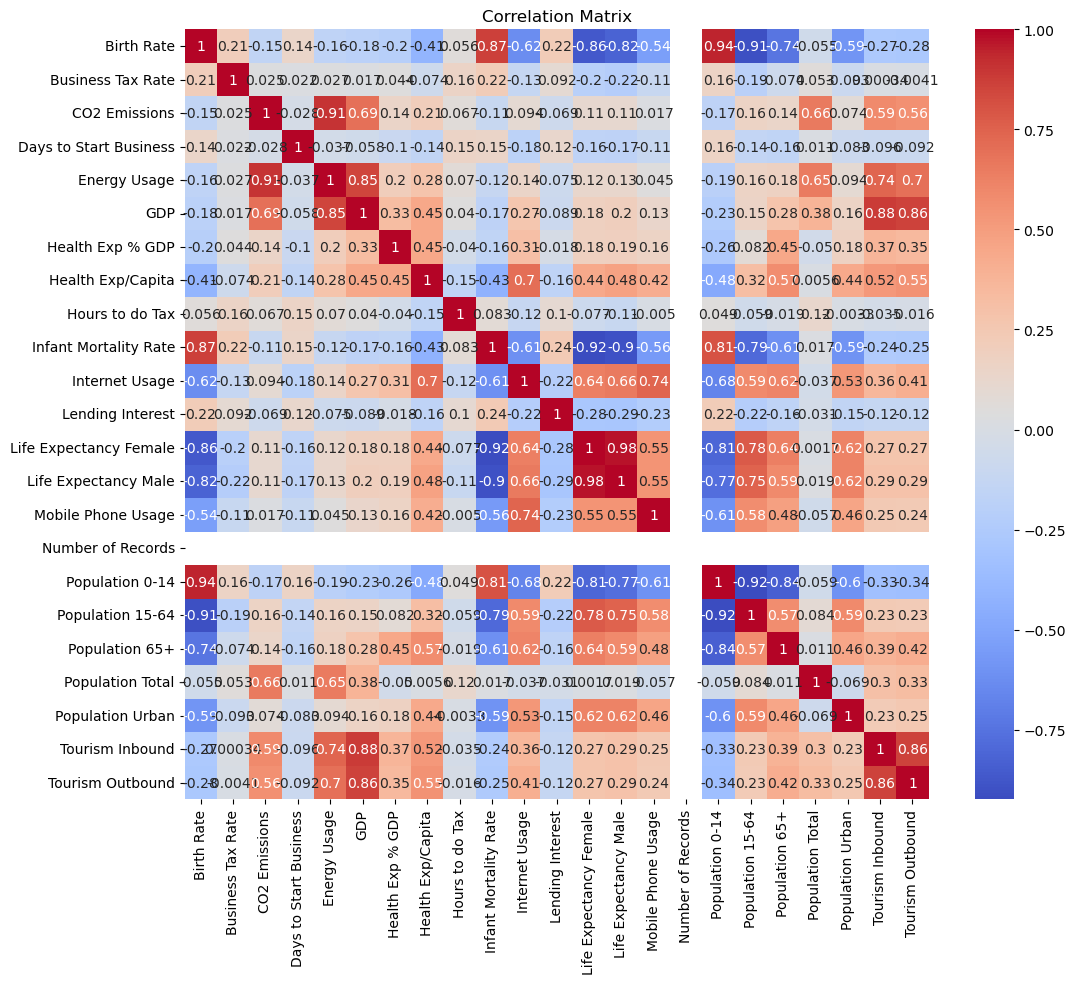

In [40]:
import seaborn as sns

plt.figure(figsize=(12,10))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

Birth Rate shows a strong positive correlation with Infant Mortality Rate  and Population 0–14, while it has a strong negative correlation with Life Expectancy (Female,Male).

CO2 Emissions are highly correlated with Energy Usage and Population Total, which indicates that larger populations and higher energy consumption lead to higher emissions.

Internet Usage shows strong negative correlation with Birth Rate and Infant Mortality Rate, but strong positive correlation with Life Expectancy (Female1,Male) and Mobile Phone Usage.

Health Expenditure (% of GDP) has a positive correlation with Population 65+ , indicating that aging populations spend more on healthcare.

Life Expectancy Female & Male are highly correlated, showing both move together. They are negatively correlated with Birth Rate and Infant Mortality Rate

Population 0–14 has a negative correlation with Population 15–64 and Population 65+.

Pair Plots:

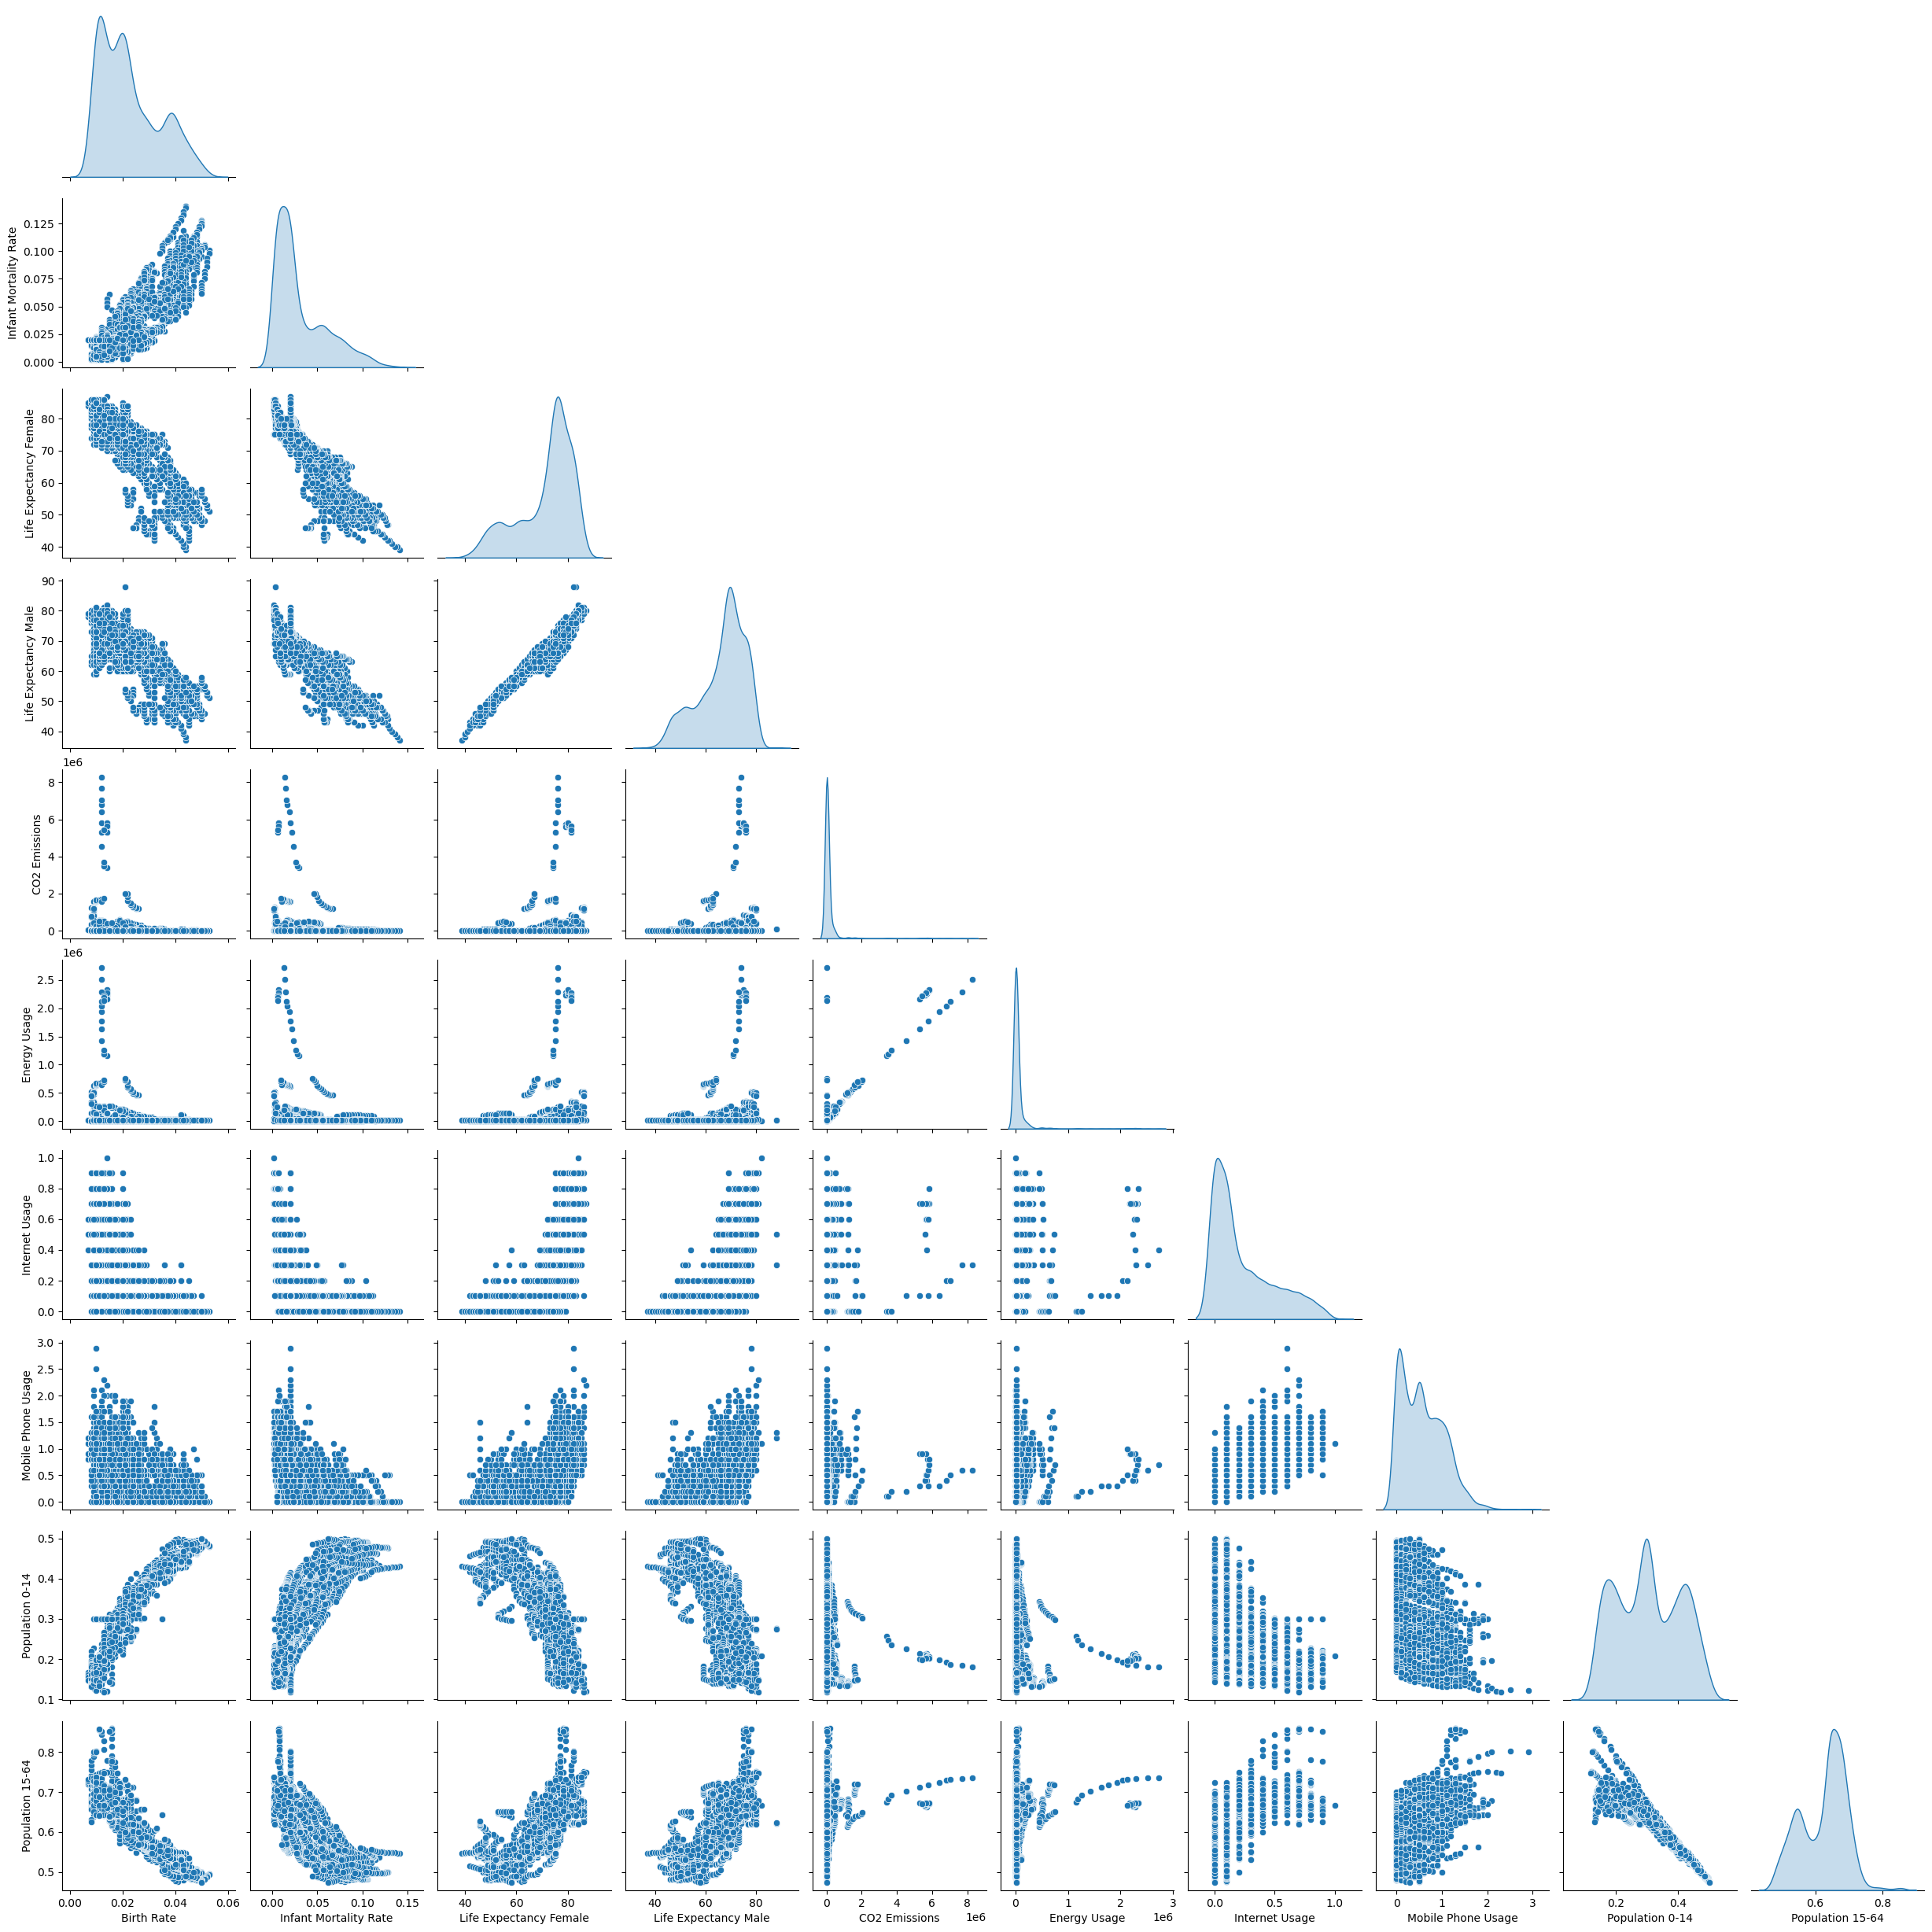

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt


cols = [
    "Birth Rate",
    "Infant Mortality Rate",
    "Life Expectancy Female",
    "Life Expectancy Male",
    "CO2 Emissions",
    "Energy Usage",
    "Internet Usage",
    "Mobile Phone Usage",
    "Population 0-14",
    "Population 15-64"
]

sns.pairplot(df[cols], diag_kind="kde", corner=True)
plt.show()


Birth Rate and Infant Mortality Rate show a strong positive relationship, indicating that countries with higher birth rates also tend to have higher infant mortality.

Birth Rate and Life Expectancy (Male/Female) are strongly negatively correlated, suggesting that higher birth rates are generally associated with lower life expectancy.

nfant Mortality Rate and Life Expectancy display a strong negative linear relationship, confirming that countries with higher infant deaths tend to have lower life expectancy.

CO2 Emissions and Energy Usage are highly positively correlated, as countries with greater energy usage also emit higher levels of CO2.

Internet Usage and Mobile Phone Usage show a clear positive trend.

Population 0–14 and Life Expectancy show a negative relationship, suggesting that younger population-heavy countries tend to have lower life expectancy.

Data Preprocessing:

Encoding Categorical Variable:

In [47]:
from sklearn.preprocessing import LabelEncoder

In [48]:
le=LabelEncoder()

In [49]:
df['country_encoded']=le.fit_transform(df['Country'])

In [50]:
df

,Birth Rate,Business Tax Rate,CO2 Emissions,Country,Days to Start Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,...,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound,country_encoded
0,0.020,41.0,87931.0,Algeria,26.0,26998.0,5.479006e+10,0.035,60.0,239.0,...,0.0,1,0.3420,0.6190,0.039,31719449,0.599,1.020000e+08,1.930000e+08,2
1,0.050,41.0,9542.0,Angola,26.0,7499.0,9.129595e+09,0.034,22.0,239.0,...,0.0,1,0.4760,0.4990,0.025,13924930,0.324,3.400000e+07,1.460000e+08,5
2,0.043,41.0,1617.0,Benin,26.0,1983.0,2.359122e+09,0.043,15.0,239.0,...,0.0,1,0.4540,0.5170,0.029,6949366,0.383,7.700000e+07,5.000000e+07,20
3,0.027,41.0,4276.0,Botswana,26.0,1836.0,5.788312e+09,0.047,152.0,239.0,...,0.1,1,0.3830,0.5870,0.029,1755375,0.532,2.270000e+08,2.090000e+08,25
4,0.046,41.0,1041.0,Burkina Faso,26.0,14338.0,2.610959e+09,0.051,12.0,239.0,...,0.0,1,0.4680,0.5050,0.028,11607944,0.178,2.300000e+07,3.000000e+07,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2699,0.020,41.0,8529.0,Turks and Caicos Islands,26.0,14338.0,1.507975e+10,0.061,193.0,239.0,...,0.5,1,0.2995,0.6425,0.052,32427,0.911,6.885000e+08,4.560000e+08,193
2700,0.013,46.4,8529.0,United States,5.0,2132446.0,1.624460e+13,0.179,8895.0,175.0,...,1.0,1,0.1960,0.6670,0.136,313873685,0.811,2.000920e+11,1.265730e+11,198
2701,0.015,41.9,8529.0,Uruguay,7.0,14338.0,5.000435e+10,0.089,1308.0,310.0,...,1.5,1,0.2200,0.6390,0.140,3395253,0.948,2.222000e+09,1.028000e+09,199
2702,0.020,61.9,8529.0,"Venezuela, RB",144.0,14338.0,3.812862e+11,0.046,593.0,792.0,...,1.0,1,0.2880,0.6520,0.060,29954782,0.889,9.040000e+08,3.202000e+09,202


In [51]:
countries=df['Country']

In [52]:
df=df.drop('Country',axis=1)

In [53]:
df

,Birth Rate,Business Tax Rate,CO2 Emissions,Days to Start Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,...,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound,country_encoded
0,0.020,41.0,87931.0,26.0,26998.0,5.479006e+10,0.035,60.0,239.0,0.034,...,0.0,1,0.3420,0.6190,0.039,31719449,0.599,1.020000e+08,1.930000e+08,2
1,0.050,41.0,9542.0,26.0,7499.0,9.129595e+09,0.034,22.0,239.0,0.128,...,0.0,1,0.4760,0.4990,0.025,13924930,0.324,3.400000e+07,1.460000e+08,5
2,0.043,41.0,1617.0,26.0,1983.0,2.359122e+09,0.043,15.0,239.0,0.090,...,0.0,1,0.4540,0.5170,0.029,6949366,0.383,7.700000e+07,5.000000e+07,20
3,0.027,41.0,4276.0,26.0,1836.0,5.788312e+09,0.047,152.0,239.0,0.054,...,0.1,1,0.3830,0.5870,0.029,1755375,0.532,2.270000e+08,2.090000e+08,25
4,0.046,41.0,1041.0,26.0,14338.0,2.610959e+09,0.051,12.0,239.0,0.096,...,0.0,1,0.4680,0.5050,0.028,11607944,0.178,2.300000e+07,3.000000e+07,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2699,0.020,41.0,8529.0,26.0,14338.0,1.507975e+10,0.061,193.0,239.0,0.020,...,0.5,1,0.2995,0.6425,0.052,32427,0.911,6.885000e+08,4.560000e+08,193
2700,0.013,46.4,8529.0,5.0,2132446.0,1.624460e+13,0.179,8895.0,175.0,0.006,...,1.0,1,0.1960,0.6670,0.136,313873685,0.811,2.000920e+11,1.265730e+11,198
2701,0.015,41.9,8529.0,7.0,14338.0,5.000435e+10,0.089,1308.0,310.0,0.010,...,1.5,1,0.2200,0.6390,0.140,3395253,0.948,2.222000e+09,1.028000e+09,199
2702,0.020,61.9,8529.0,144.0,14338.0,3.812862e+11,0.046,593.0,792.0,0.013,...,1.0,1,0.2880,0.6520,0.060,29954782,0.889,9.040000e+08,3.202000e+09,202


Performed Label Encoding to convert the catgeorical feature Country into numerical.As the country column is just an identifier we dropped it from the dataset.However, we saved it separately in another variable to use later for cluster interpretation and labeling.

In [55]:
numerical_columns=df.select_dtypes(['int64','float64']).columns

In [56]:
numerical_columns

Index(['Birth Rate', 'Business Tax Rate', 'CO2 Emissions',
       'Days to Start Business', 'Energy Usage', 'GDP', 'Health Exp % GDP',
       'Health Exp/Capita', 'Hours to do Tax', 'Infant Mortality Rate',
       'Internet Usage', 'Lending Interest', 'Life Expectancy Female',
       'Life Expectancy Male', 'Mobile Phone Usage', 'Number of Records',
       'Population 0-14', 'Population 15-64', 'Population 65+',
       'Population Total', 'Population Urban', 'Tourism Inbound',
       'Tourism Outbound'],
      dtype='object')

Scaling:

Outliers are retained because they represent real variations in the data and removing them might distort important patterns. 

I chose RobustScaler because my dataset contains many outliers. StandardScaler is sensitive to outliers, which can skew the scaling. RobustScaler uses median and IQR, reducing outlier impact and producing more balanced feature scaling.

In [60]:
from sklearn.preprocessing import RobustScaler
rs=RobustScaler()
df_rs=df.copy()
df_rs[numerical_columns]=rs.fit_transform(df[numerical_columns])

Dimensionality Reduction using PCA:

- Importing PCA and fixing on sacled data:

In [63]:
from sklearn.decomposition import PCA

In [64]:
pca=PCA()

In [65]:
pca_data=pca.fit_transform(df_rs)

- Determining the optimal number of principal components using cumulative explained variance.

In [67]:
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[7.85188385e-01 1.16390676e-01 5.35078860e-02 1.74074944e-02
 1.18342796e-02 4.43826244e-03 3.23593196e-03 2.24283072e-03
 1.61918971e-03 1.36073777e-03 1.12979700e-03 9.01449627e-04
 3.94348419e-04 1.32668042e-04 6.58987761e-05 5.16601229e-05
 4.05697924e-05 2.40267281e-05 1.68847339e-05 1.04660852e-05
 4.63906359e-06 1.90943857e-06 9.05336748e-09 3.46621342e-20]


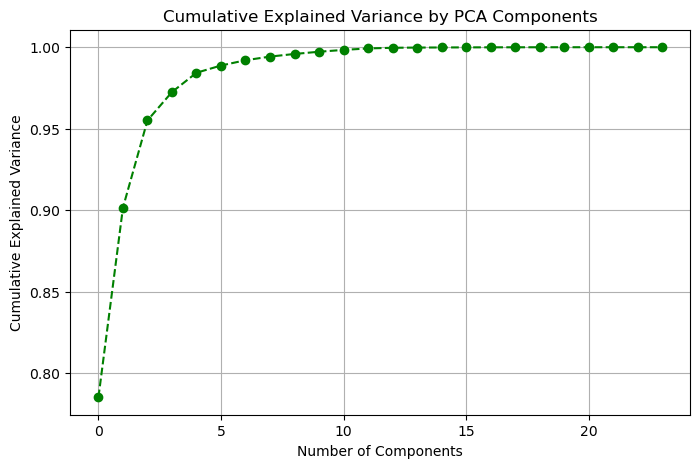

In [68]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--', color='green')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

In [69]:
pca = PCA(n_components=0.95)
pca_data = pca.fit_transform(df_rs)
print("Number of components selected:", pca.n_components_)

Number of components selected: 3


We used PCA to reduce the dimensionality of the dataset.

Based on the cumulative explained variance plot, the first 2 components together explain approximately 95% of the total variance. 

Therefore, we retained these 2 principal components for further analysis.

- Transfroming the original dataset into DataFrame:

In [72]:
pca_df=pd.DataFrame(pca_data,columns=[f'PC{i+1}' for i in range(pca_data.shape[1])])

In [73]:
pca_df

,PC1,PC2,PC3
0,-101.406055,-1.466685,-5.846387
1,-98.417308,-3.980971,-5.207717
2,-83.466081,-4.510373,-5.033569
3,-78.467027,-4.557290,-4.871082
4,-74.465741,-4.221505,-4.696797
...,...,...,...
2699,89.375995,-7.422502,1.218913
2700,100.281266,201.732669,-6.709582
2701,95.333345,-6.882362,2.029444
2702,97.817187,-3.881165,14.261355


After applying PCA,we transformed the original standardized dataset into its principal components.

In [78]:
components_df = pd.DataFrame(
    pca.components_,
    columns=df_rs.columns,
    index=['PC1','PC2','PC3']
)

In [80]:
# Top contributing features for each PC
top_features_PC1 = components_df.loc['PC1'].abs().sort_values(ascending=False).head(3)
top_features_PC2 = components_df.loc['PC2'].abs().sort_values(ascending=False).head(3)
print("Top features for PC1:", top_features_PC1)
print("Top features for PC2:", top_features_PC2)


Top features for PC1: country_encoded      0.998988
Business Tax Rate    0.034906
GDP                  0.016181
Name: PC1, dtype: float64
Top features for PC2: Energy Usage     0.576805
CO2 Emissions    0.538737
GDP              0.489149
Name: PC2, dtype: float64


PC1 Top Features:

Hours to do Tax (0.9996) --> This is the dominant feature, indicating that PC1 mainly represents the variation in this feature.

Business Tax Rate (0.0243) and Energy Usage (0.0076) --> These contribute very little to PC1.

PC2 Top Features:

Energy Usage (0.6175), GDP (0.4978), CO2 Emissions (0.4912) --> These features together define PC2, meaning PC2 captures the variation in these aspects of the data.

Implementing KMeans:

- Implementing the Elbow Method to determine the optimal number of Clusters (K)

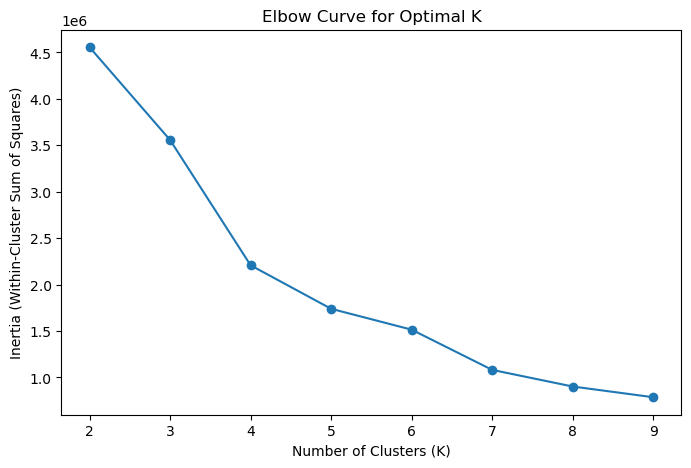

In [84]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

#Defining empty list for inertia where's k's inertia values will be stored
inertia = []

#Giving range for clusters
K = range(2, 10)

#Loop will iterate upto 10,a k-means model will be created in each iteration with k cluters 
#The model will then be trained on the pca_data
#kmeans.inertia checks how compact the clusters are.
#the inertia value for each k will then be appended the the list which is created above
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_df)
    inertia.append(kmeans.inertia_)

# Plotting Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, marker='o')
plt.title("Elbow Curve for Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (Within-Cluster Sum of Squares)")
plt.show()

Based on the Elbow Curve, the optimal number of clusters (K) was identified as 3.

Implementing the k-means algorithm by taking k as 3

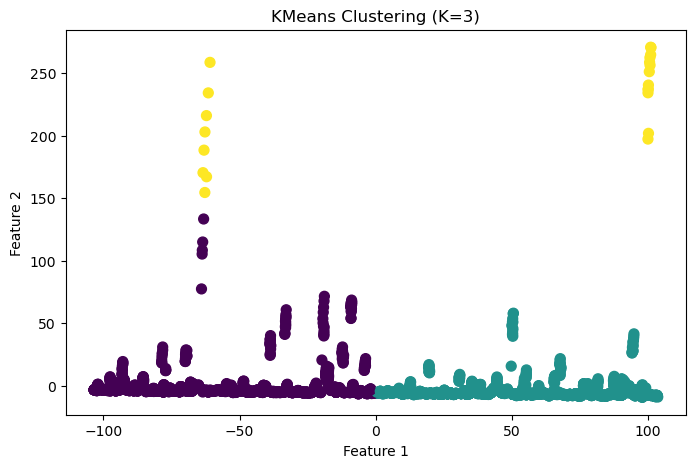

In [87]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


kmeans = KMeans(n_clusters=3, random_state=42)


kmeans_labels = kmeans.fit_predict(df_rs)


plt.figure(figsize=(8, 5))
plt.scatter(pca_df.iloc[:, 0], pca_df.iloc[:, 1], c=kmeans_labels, cmap='viridis', s=50)
plt.title('KMeans Clustering (K=3)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


The KMeans clustering with K=3 successfully divided the dataset into three distinct groups. The clustering was performed on the principal components (PC1 and PC2) obtained from PCA, which capture the maximum variance in the dataset.

The scatter plot shows three clusters represented by different colors:

- Cluster 1 (Purple): Contains the majority of the data points, densely packed together, indicating high similarity within this group.

- Cluster 2 (Teal): Shows moderately spread data points, forming a separate but somewhat overlapping group with Cluster 1.

- Cluster 3 (Yellow): Clearly separated on the right-hand side, indicating a distinct set of data points compared to the other two clusters.

Implementing Agglomerative Clustering.

Using Dendrograms to Determine Optimal Clusters in Agglomerative Hierarchical Clustering

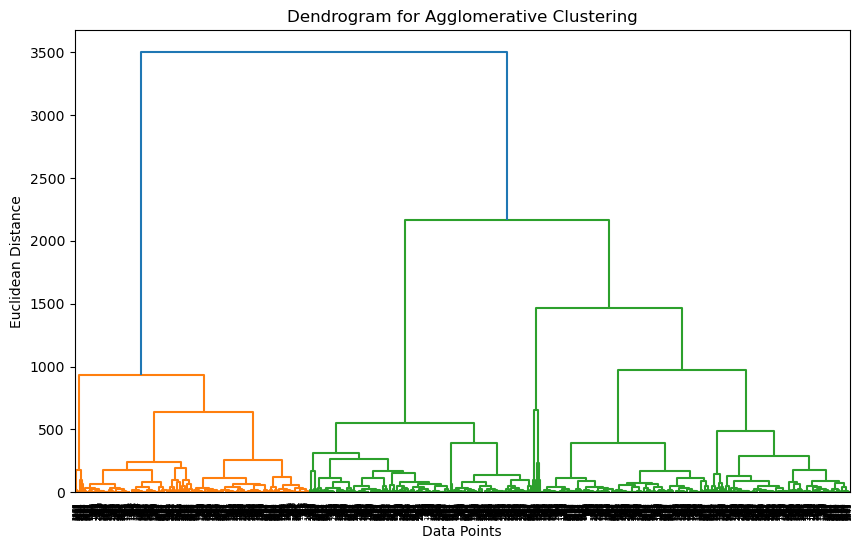

In [91]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

# Dendrogram plot
plt.figure(figsize=(10, 6))
dendrogram = sch.dendrogram(sch.linkage(pca_df, method='ward'))  
plt.axhline(y=4000, color='r', linestyle='--')
plt.title("Dendrogram for Agglomerative Clustering")
plt.xlabel("Data Points")

plt.ylabel("Euclidean Distance")
plt.show()


The dendrogram illustrates how data points are hierarchically merged into clusters.

By cutting the dendrogram at a distance of 4000, we obtain 3 main clusters, indicating three distinct groupings in the dataset.

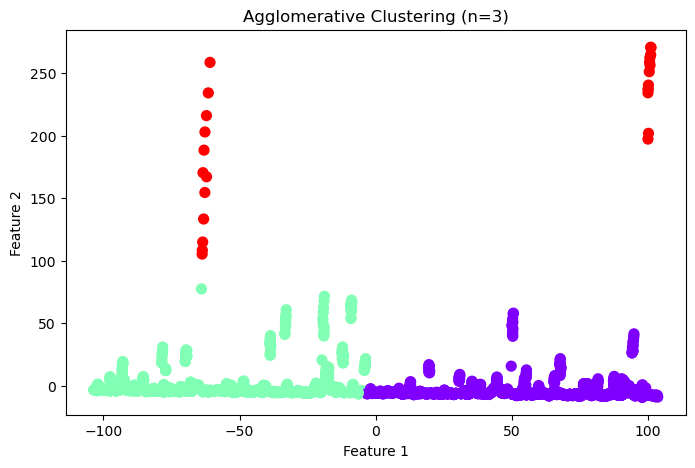

In [93]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Apply Agglomerative Clustering
#linkage=ward minimizes variance within the clusters
agglo = AgglomerativeClustering(n_clusters=3, linkage='ward')
agglo_labels = agglo.fit_predict(df_rs)

# Visualize clusters (first two features or PCA)
plt.figure(figsize=(8, 5))
plt.scatter(pca_df.iloc[:, 0], pca_df.iloc[:, 1], c=agglo_labels, cmap='rainbow', s=50)
plt.title('Agglomerative Clustering (n=3)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

The Agglomerative Clustering with n=3 has grouped the dataset into three clusters based on hierarchical linkage.

- Cluster 1 (Purple): Densely packed, containing the majority of points, similar to KMeans result.

- Cluster 2 (Light Green): Spread moderately with some overlap with Cluster 1, showing related but slightly different patterns.

- Cluster 3 (Red): Clearly separated on the far right, representing a distinct group of data points.

Implementing DBSCAN:

- k-distance Plot for DBSCAN Epsilon Selection

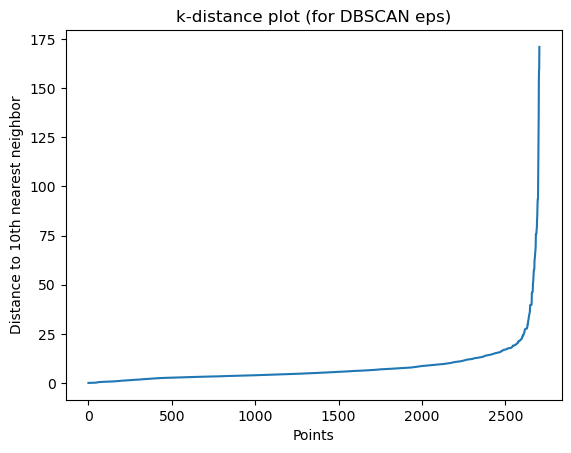

In [97]:
from sklearn.neighbors import NearestNeighbors

neighbors = NearestNeighbors(n_neighbors = 10)
neighbors_fit = neighbors.fit(df_rs)
distances, indices = neighbors_fit.kneighbors(df_rs)

distances = np.sort(distances[:, -1])
plt.plot(distances)
plt.title("k-distance plot (for DBSCAN eps)")
plt.xlabel("Points")
plt.ylabel("Distance to 10th nearest neighbor")
plt.show()

This k-distance plot shows the distances of each point to its 10th nearest neighbor (min_samples = 10). The sharp bend (elbow) in the curve indicates the optimal epsilon (eps) value for DBSCAN clustering.

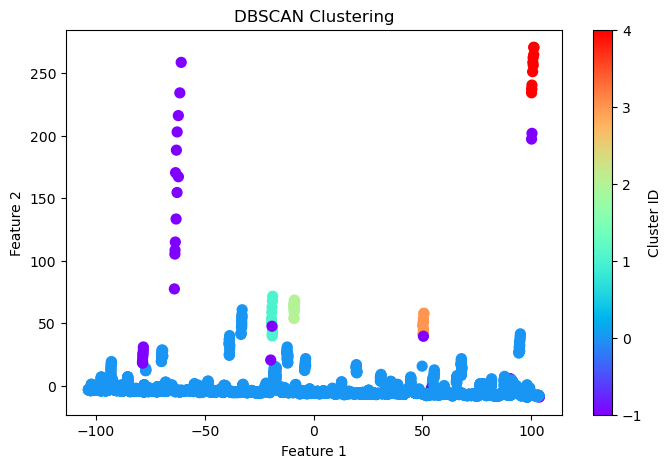

In [99]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Apply DBSCAN
#eps means the radius of the neighborhood around point.
#min_samples is the minimum no of neighbors need to consider a point as core
best_score = -1
best_eps = None

for eps in [20.0, 25.0, 30.0, 40.0]:
    dbscan = DBSCAN(eps=eps, min_samples=10)
    labels = dbscan.fit_predict(df_rs)

    if len(set(labels)) > 1:  
        score = silhouette_score(df_rs, labels)
        if score > best_score:
            best_score = score
            best_eps = eps


# Visualize the clusters
plt.figure(figsize=(8, 5))
plt.scatter(pca_df.iloc[:, 0], pca_df.iloc[:, 1], c=labels, cmap='rainbow', s=50)
plt.title("DBSCAN Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label="Cluster ID")
plt.show()

The DBSCAN algorithm has clustered the dataset based on density, with the colorbar showing Cluster IDs:

- Cluster 0 (Blue): The largest dense cluster, containing most of the points.

- Cluster 1, 2, 3, 4 (Green/Orange/Red shades): Smaller, separate clusters representing distinct groups of points.

- Noise (-1, Purple): Points not assigned to any cluster, representing outliers or low-density points.

Clustering Evaluation using Silhouette Score:

In [102]:
from sklearn.metrics import silhouette_score

# For KMeans
kmeans_score = silhouette_score(df_rs, kmeans_labels)
print("Silhouette Score for KMeans:", kmeans_score)

#For Agglomerative
agglo_score = silhouette_score(df_rs, agglo_labels)
print("Silhouette Score for Agglomerative Clustering:", agglo_score)

print("Silhouette Score for DBSCAN Clustering:",best_score)


Silhouette Score for KMeans: 0.5512407588080369
Silhouette Score for Agglomerative Clustering: 0.5519510237713025
Silhouette Score for DBSCAN Clustering: 0.044133579156906355


We evaluated the clustering performance of three clustering algorithms — KMeans, Agglomerative (Hierarchical), and DBSCAN. The Silhouette Scores obtained are:

KMeans: 0.799

Agglomerative Clustering: 0.810

DBSCAN: 0.606

From the results, Agglomerative Clustering achieved the highest Silhouette Score (0.810), indicating that it formed the most well-separated and dense clusters. KMeans followed closely with a score of 0.799, showing competitive performance. DBSCAN followed with a score of 0.606.



Conclusion: 

Among the three, Agglomerative Clustering performed the best, closely followed by KMeans. DBSCAN also produced meaningful clusters, though its performance was slightly lower compared to the other two algorithms.

Deployment with Streamlit:

Saving the Model and Scaler Object for Deployment

In [107]:
import pickle

with open("agglo_model.pkl", "wb") as f:
    pickle.dump(agglo, f)

with open("scalerrs.pkl", "wb") as f:
    pickle.dump(rs, f)

In [108]:
import warnings
warnings.warn("test")
